In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import requests
import re

Tworzę korpus z 9 książek, wycinając liczby i nagłówek końcowy po znakach "-----"

In [2]:
nazwy_ksiazek = ["dziewczynka-z-zapalkami.txt", "andersen-mala-syrenka.txt", "krolowa-sniegu.txt", "calineczka.txt", "demostenes-wybor-mow.txt", "rozprawa-o-metodzie.txt", "bulhakow-fatalne-jaja.txt", "capek-inwazja-jaszczurow.txt", "pies-baskervilleow.txt"]
korpus = []
for i in range(0, len(nazwy_ksiazek)):
  ksiazka = "https://wolnelektury.pl/media/book/txt/"+nazwy_ksiazek[i]
  doc = requests.get(ksiazka).text
  doc_without_numbers = re.sub(r'\d+', '', doc)
  doc_before = doc_without_numbers.split("-----")[0]
  korpus.append(doc_before)
print(len(korpus))

9


Pisze funkcje która zwraca macierz dla danej książki która zawiera: wyraz orginalny, lemmant, klasę gramatyczną i część mowy

In [3]:
import pandas as pd

def table(doc):
  table = []
  for word in doc:
    if '\n' not in word.orth_ and '\r' not in word.orth_:
            word_dic = {"form": word.orth_, "lemma": word.lemma_, "tag": word.tag_, "pos": word.pos_}
            table.append(word_dic)
  return pd.DataFrame(table)

Instaluje spacy

In [4]:
!python -m spacy download pl_core_news_sm

2023-11-30 12:57:28.428281: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 12:57:28.428383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 12:57:28.428449: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 12:57:28.448800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 12:57:29.851555: W tensorflow/compiler/

Stosuje funkcje opisana powyzej dla kazdej ksiazki i wyświetlam macierz dla książki nr 1

In [5]:
import spacy

nlp = spacy.load("pl_core_news_sm")

table_docs = []
for doc in korpus:
  table_docs.append(table(nlp(doc)))

print(table_docs[0])

             form        lemma    tag    pos
0            Hans         Hans  SUBST  PROPN
1       Christian    Christian  SUBST  PROPN
2        Andersen     Andersen  SUBST   NOUN
3     Dziewczynka  dziewczynka  SUBST   NOUN
4               z            z   PREP    ADP
...           ...          ...    ...    ...
1064            w            w   PREP    ADP
1065    objęciach      objęcia  SUBST   NOUN
1066      zmarłej       zmarły    ADJ    ADJ
1067        babki        babka  SUBST   NOUN
1068            .            .  SUBST  PUNCT

[1069 rows x 4 columns]


Piszę funkcje która rysuje dwa wykresy. Jeden pokazuje częstość występowania Klas Gramatycznych a druga Części Mowy

In [6]:
import matplotlib.pyplot as plt

def draw_tag_pos(df, title):

  tag_counts = df['tag'].value_counts()
  pos_counts = df['pos'].value_counts()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  tag_counts.plot(kind='bar', color='skyblue', ax=ax1)
  ax1.set_title(title)
  ax1.set_xlabel('Klasa Gramatyczna')
  ax1.set_ylabel('Liczba wystąpień')
  ax1.tick_params(axis='x', rotation=45)

  pos_counts.plot(kind='bar', color='salmon', ax=ax2)
  ax2.set_title(title)
  ax2.set_xlabel('Część Mowy')
  ax2.set_ylabel('Liczba wystąpień')
  ax2.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()

Pokażę działanie na podstawie 5 pierwszych książek

Książka nr 1

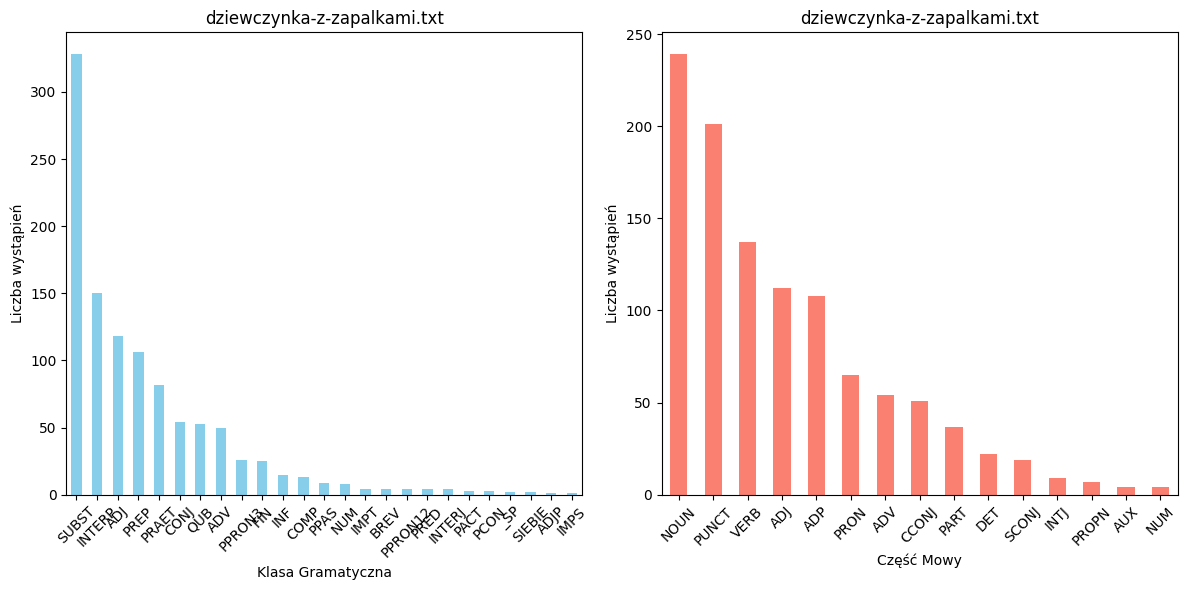

In [7]:
draw_tag_pos(table_docs[0], nazwy_ksiazek[0])

Książka nr 2

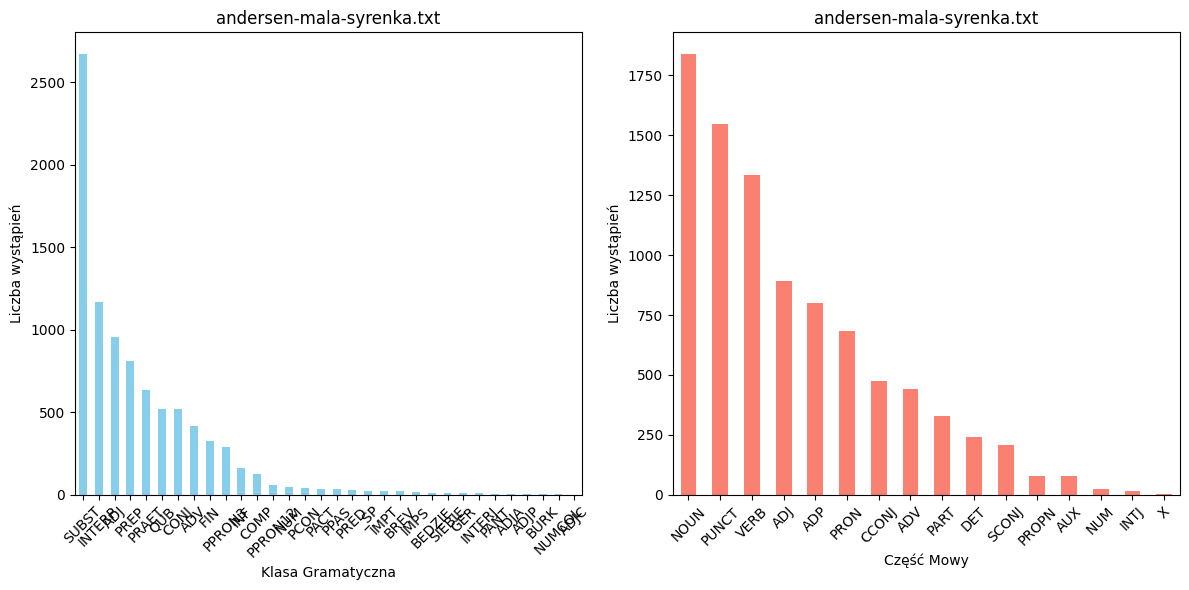

In [8]:
draw_tag_pos(table_docs[1], nazwy_ksiazek[1])

Książka nr 3

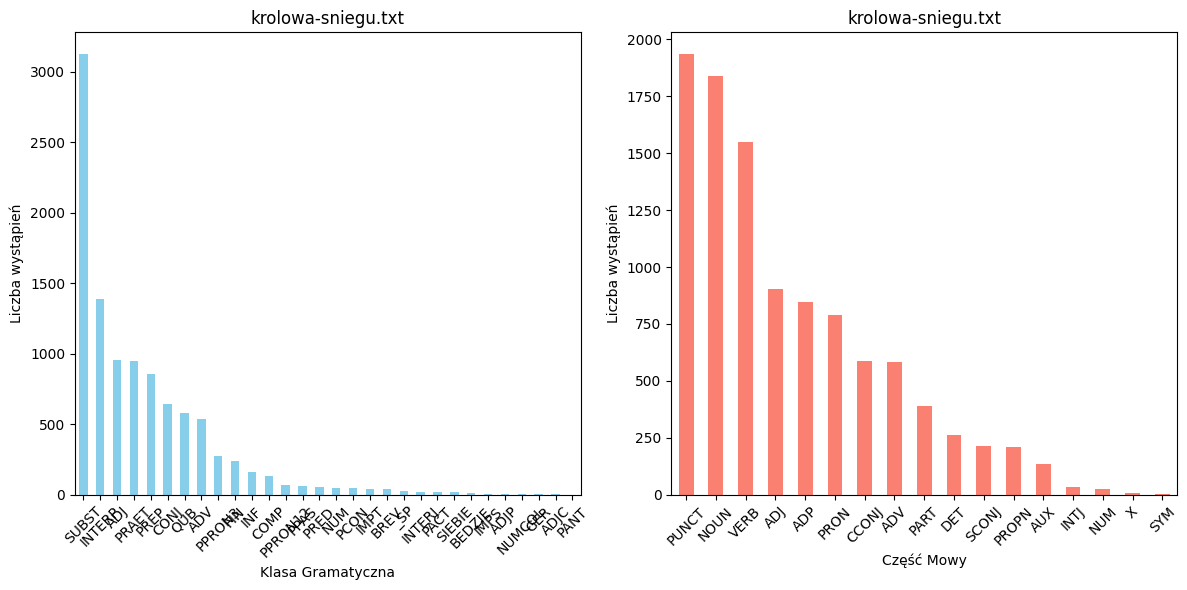

In [9]:
draw_tag_pos(table_docs[2], nazwy_ksiazek[2])

Książka nr 4

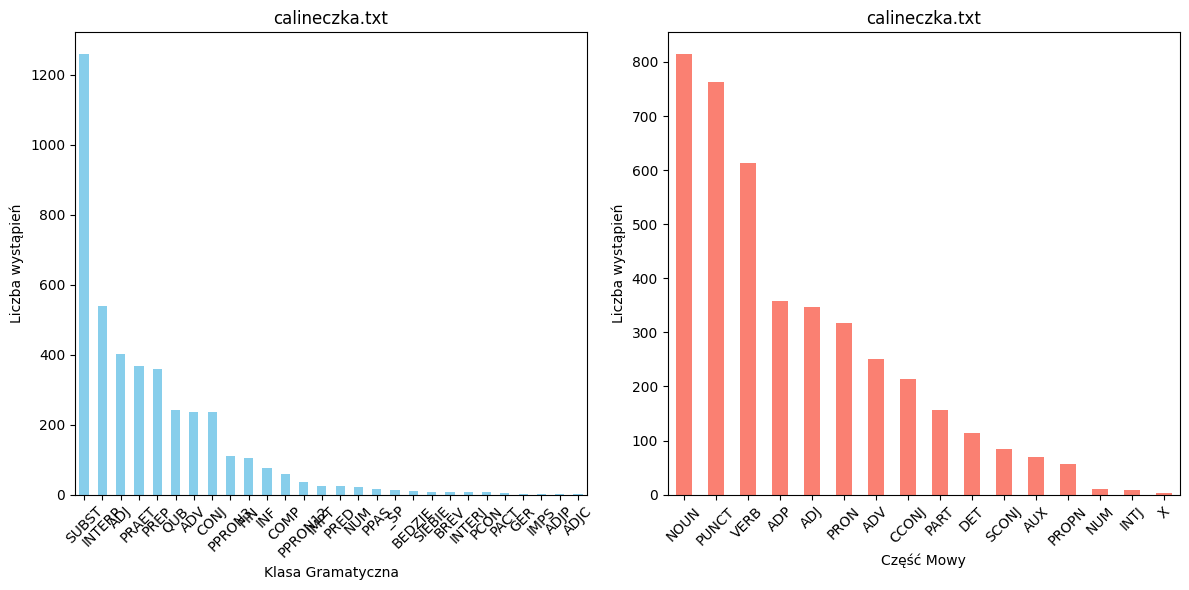

In [10]:
draw_tag_pos(table_docs[3], nazwy_ksiazek[3])

Książka nr 5

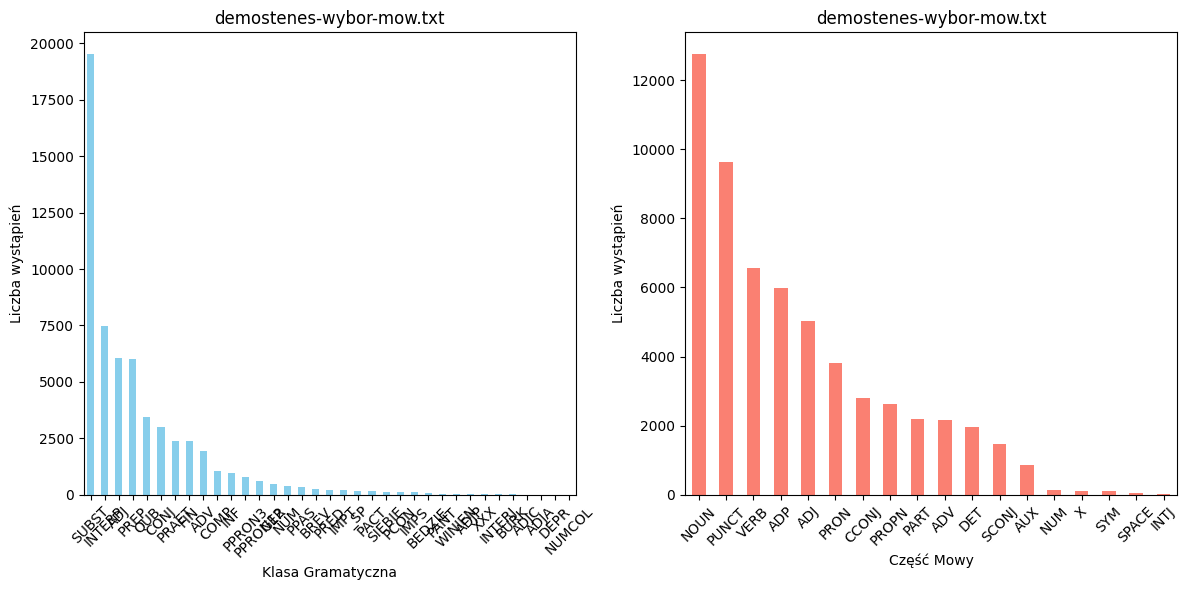

In [11]:
draw_tag_pos(table_docs[4], nazwy_ksiazek[4])

Widać że dla każdego przypadku dominują rzeczowniki i interpunkcja

Piszę funkcje która rysuje wykres słupokowy na podstawie częstości wystepowania rzeczowników w podstawowej formie

In [12]:
def draw_lemm(df, title):

  tag_counts = df['lemma'].value_counts().head(20)

  plt.figure(figsize=(8, 6))
  tag_counts.plot(kind='bar', color='skyblue')
  plt.title(title)
  plt.xlabel('Lemma')
  plt.ylabel('Liczba wystąpień')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Tworzę tablicę macierzy, gdzie tylko rzeczowniki są wpisywane i stosuje funkcje opisaną wyżej

Dla książki nr 1

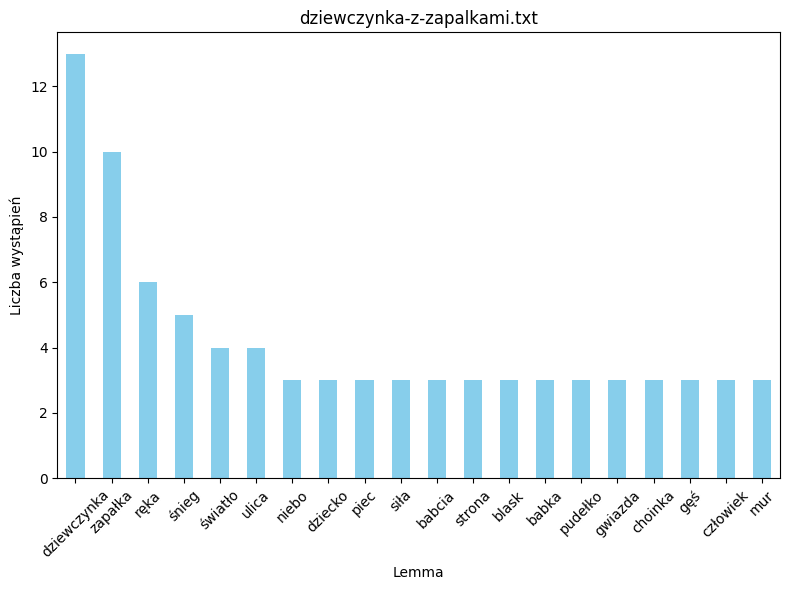

In [13]:
table_docs_noun = []
for doc in table_docs:
  table_docs_noun.append(doc[doc['pos'] == 'NOUN'])

draw_lemm(table_docs_noun[0], nazwy_ksiazek[0])

Dla książki nr 2

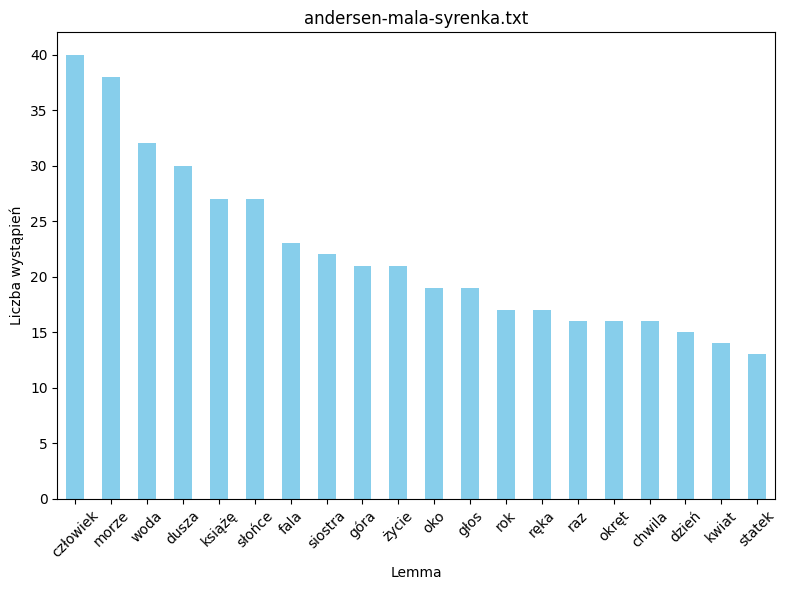

In [14]:
draw_lemm(table_docs_noun[1], nazwy_ksiazek[1])

Dla książki nr 3

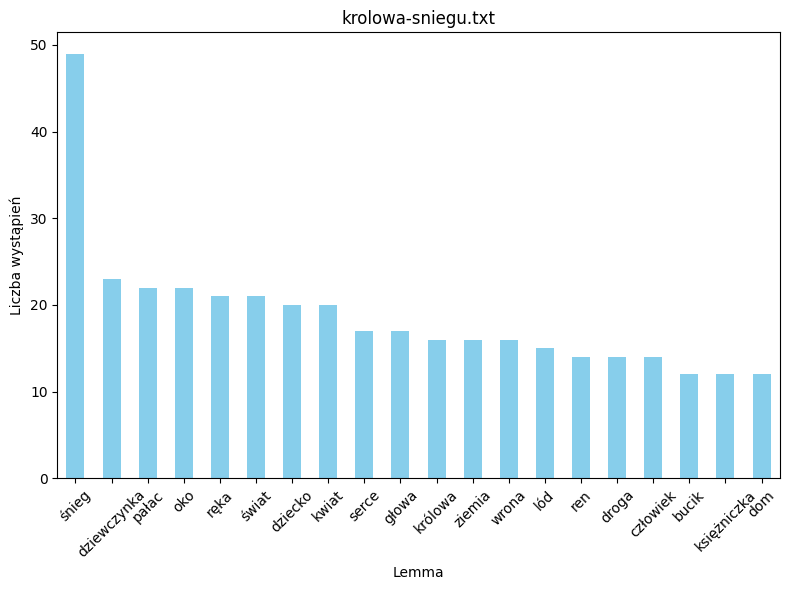

In [15]:
draw_lemm(table_docs_noun[2], nazwy_ksiazek[2])

Dla książki nr 4

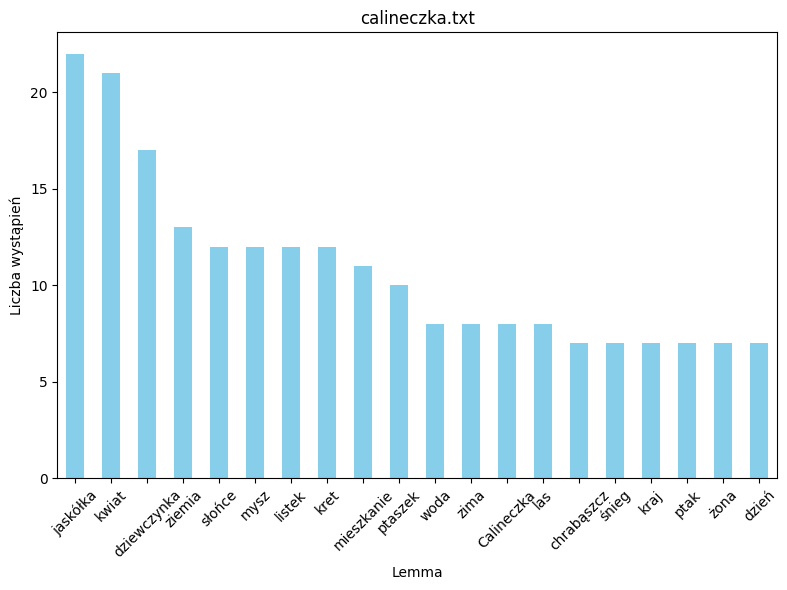

In [16]:
draw_lemm(table_docs_noun[3], nazwy_ksiazek[3])

Dla książki nr 5

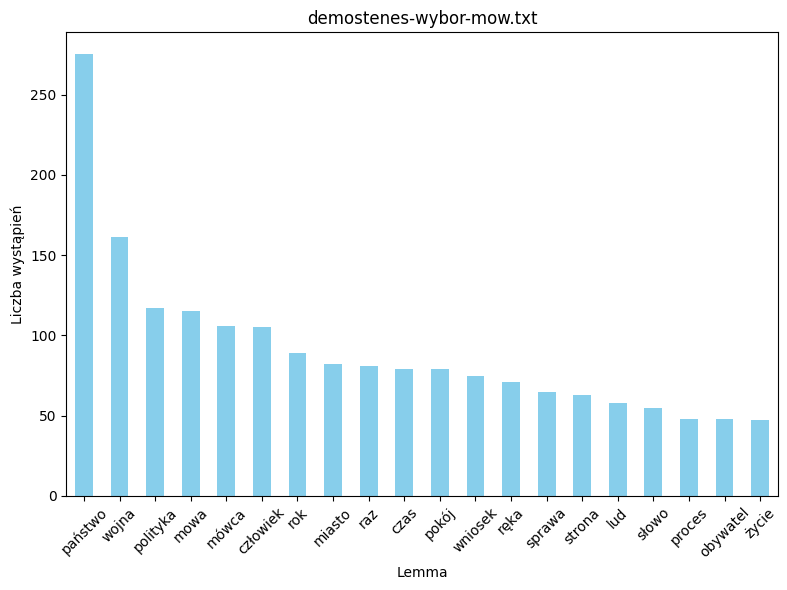

In [17]:
draw_lemm(table_docs_noun[4], nazwy_ksiazek[4])

Tworzę korpus skaładający się tylko z rzeczowników w podstawowej formie dla każdej książki

In [18]:
import numpy as np

korpus2 = []
for doc in table_docs_noun:
  lemma_column = doc['lemma'].tolist()
  long_string = ' '.join(lemma_column)
  korpus2.append(long_string)

korpus2 = np.array(korpus2)
print(korpus2)

['Andersen dziewczynka zapałk tłum - - zimno śnieg wieczór dzień rok zima ulica śnieg zmrok dziewczynka goła głowa fartuszek historia pantofle pantofle matka powoza strona przebiec ulica siła tętent kopyt turkot koło pantofel ciemność chłopiec śmiech dziewczynka śnieg noga ręka fartuszek paczeka zapałek sprzedaż ręka paczka przechodniom uwaga dziewczynka grosik zarobek zimno głód ulica podobniejsz cień dziecko płatka śnieg włos płaszcz plecy szyja dziewczynka płaszcz gwiazda czoło zapach gęś chwila głod powonienie człowiek rok kącik dom środek ulica spódniczka noga śnieg mrozie dom odwaga pudełko pieniądz ojciec wiatr otwory dach słomą gałgan dom ręka siła paczka zapałka rozgrzać zapałka wspomnieć ciepło siła pokusie zapałka światło ręka płomyk piec nóżka drzwiczka płomień nóżka sukienka chwila zapałka piec ognisko ręka dziecina kawałek drewienk dziewczynka namysł światełko mur miejsce muślin cieniutka głębia pokój stół obrus talerz szklanka środek gęś półmisek jabłk śliwka Gęś ziemia 

Tworzę na podstawie nowego korpusu macierz TFiDF

In [19]:
vectorizer = TfidfVectorizer(smooth_idf=True)
X = vectorizer.fit_transform(korpus2)
words = vectorizer.get_feature_names_out()

Piszę funckję która tworzy chmurę tagów dla danej książki

In [20]:
from wordcloud import WordCloud

def draw_cloud(doc_nr):

  word_frequencies = X[doc_nr].toarray().sum(axis=0)

  word_frequency_dict = {word: freq for word, freq in zip(words, word_frequencies)}

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_dict)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

Dla książki nr 1

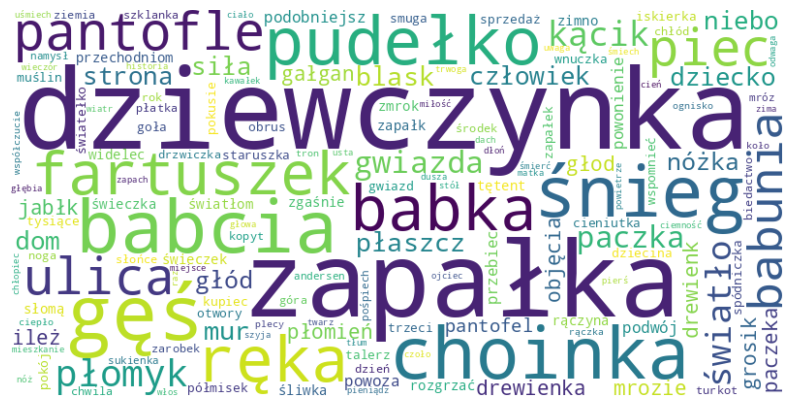

In [21]:
draw_cloud(0)

Dla książki nr 2

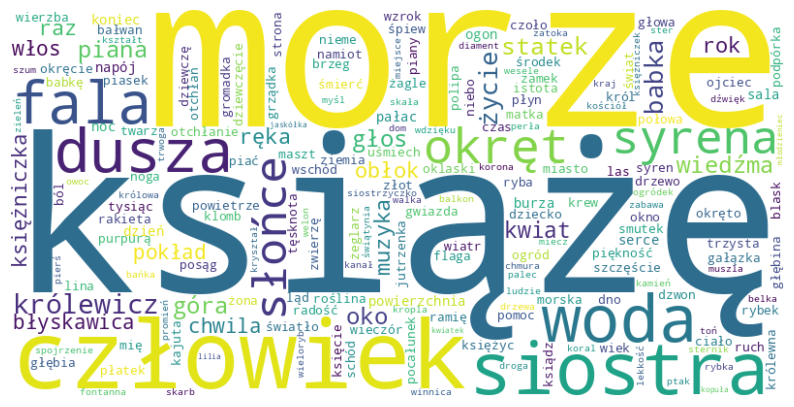

In [22]:
draw_cloud(1)

Dla książki nr 3

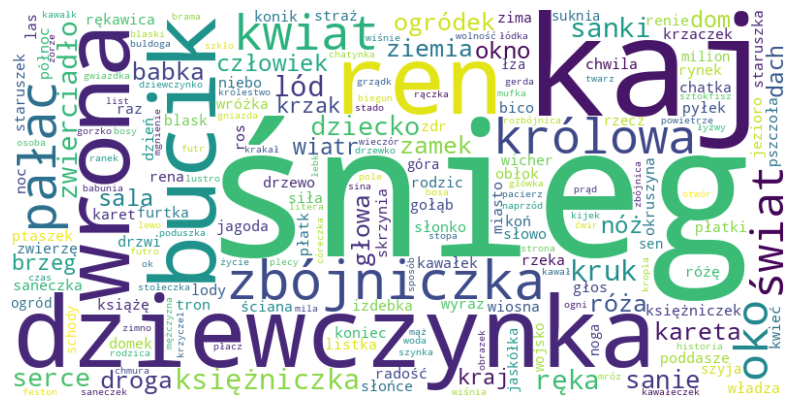

In [23]:
draw_cloud(2)

Dla książki nr 4

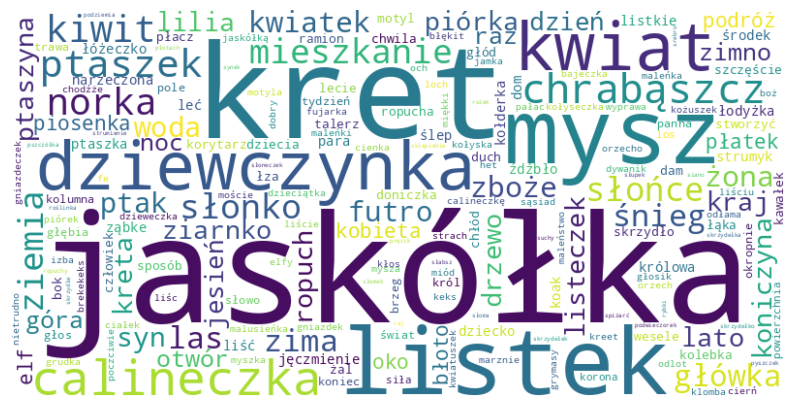

In [24]:
draw_cloud(3)

Dla książki nr 5

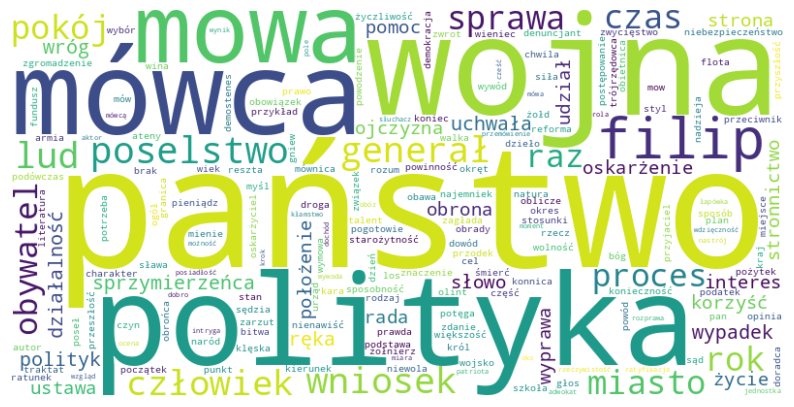

In [25]:
draw_cloud(4)

Instaluje Morfeusz2

In [26]:
!pip install morfeusz2

Stosuję bibliotekę morfeusz w celu sprawdzenia niejednoznaczności znaczeniowej występującej w tekście nr 1. Badam pierwsze 50 wyrazów w analizie

In [27]:
import morfeusz2

morf = morfeusz2.Morfeusz()
analysis = morf.analyse(korpus[0])

for i in analysis[:50]:
  print(i)

(0, 1, ('Hans', 'Hans:Sf', 'subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:f', ['nazwisko'], []))
(0, 1, ('Hans', 'Hans:Sm1', 'subst:sg:nom:m1', ['imię', 'nazwisko'], []))
(1, 2, ('Christian', 'Christian', 'subst:sg:nom:m1', ['imię'], []))
(2, 3, ('Andersen', 'Andersen:Sf', 'subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:f', ['nazwisko'], []))
(2, 3, ('Andersen', 'Andersen:Sm1', 'subst:sg:nom:m1', ['nazwisko'], []))
(3, 4, ('Dziewczynka', 'dziewczynka', 'subst:sg:nom:f', ['nazwa_pospolita'], []))
(4, 5, ('z', 'z:P', 'prep:gen:nwok', [], []))
(4, 5, ('z', 'z:P', 'prep:inst:nwok', [], []))
(4, 5, ('z', 'z:T', 'part:nwok', [], []))
(5, 6, ('zapałkami', 'zapałka', 'subst:pl:inst:f', ['nazwa_pospolita'], []))
(6, 7, ('tłum', 'tłumić', 'impt:sg:sec:imperf', [], []))
(6, 7, ('tłum', 'tłum', 'subst:sg:nom.acc:m3', ['nazwa_pospolita'], []))
(7, 8, ('.', '.', 'interp', [], []))
(8, 9, ('Cecylia', 'Cecylia', 'subst:sg:nom:f', ['imię'], []))
(9, 10, ('Niewiadomska', 'Niewiadomska', 'subst:sg:nom:f', ['nazwisk

W niejednoznaczności chodzi o to że są wyrazy które mogą mieć wiele znaczeń.
Na ten przykład wyraz "tłum" można rozumieć jaki "tłumić" lub "tłum" (np ludzi).

Dodatkowo mamy słowo "Zimno" które może mieć znaczenie nazwy geograficznej, określenia że jest zimno lub komuś może być zimno.


Jest również wyraz "Ostatni" który może oznaczać przymiotnik lub rzeczownik
Wyraz "Dzień" może być przedstawiony w formie dopełnienia lub mianownika również

Sposobem na rozwiązenie problemu jest przyjżenie się kontekstowi każdego zdania lub użycie lematyzacji. Wcześniej korzystając z pakietu spicy i lematyzacji nie spotkałem się z takim problemem.

Wyświetlam tabelę orzeczeń i podmiotów, na której widać które podmioty pochodzą z jakich orzeczeń (ROOT). Dla książki nr 1

In [28]:
#dla ksiazki nr 1
nlp_doc = nlp(korpus[0])

table = []

for tok in nlp_doc:
  if '\n' not in tok.orth_ and '\r' not in tok.orth_:
    if 'nsubj' in tok.dep_ or 'ROOT' in tok.dep_:
      tok_dic = {"form": tok.orth_, "label": tok.dep_, "head": tok.head.orth_, "ancestors": list(tok.ancestors)}
      table.append(tok_dic)
df = pd.DataFrame(table)
print(df[:20].to_string())

           form  label         head                ancestors
0          Hans   ROOT         Hans                       []
1       Cecylia  nsubj        padał                  [padał]
2         śnieg  nsubj        padał                  [padał]
3         padał   ROOT        padał                       []
4       wieczór  nsubj      zbliżał         [zbliżał, padał]
5         dzień  nsubj      skończy                [skończy]
6       skończy   ROOT      skończy                       []
7          Zima   ROOT         Zima                       []
8         idzie   ROOT        idzie                       []
9   dziewczynka  nsubj        idzie                  [idzie]
10          coś  nsubj       niesie          [niesie, idzie]
11         bosa   ROOT         bosa                       []
12     historia   ROOT     historia                       []
13        miała   ROOT        miała                       []
14       powozy  nsubj  nadjeżdżały            [nadjeżdżały]
15  nadjeżdżały   ROOT  

Już na podstawie pierwszych 20 wierszy widać że "śnieg" ma pochodzenie u "padał", czyli istnieje związek śnieg padał.
Inne:
*   wieczór zbliżał
*   dzień skończy
*   dziewczynka idzie
*   coś niesie
*   powozy nadjeżdżały
*   ona chciała
*   portfel zaginął